In [5]:
#Sample Data : 
dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

Write a program using tensorflow to build a batch gradient descent model for logistic regression.


Epoch: 0050 cost= 0.251550317 W= 1.55782 b= 2.26759
Epoch: 0100 cost= 0.115987092 W= 1.37878 b= 2.82363
Optimization Finished!
Training cost= 0.115987 W= 1.37878 b= 2.82363 

Epoch: 0050 cost= 0.053480696 W= 1.25721 b= 3.2012
Epoch: 0100 cost= 0.024659365 W= 1.17465 b= 3.45759
Epoch: 0150 cost= 0.011370277 W= 1.1186 b= 3.63168
Epoch: 0200 cost= 0.005242747 W= 1.08053 b= 3.7499
Optimization Finished!
Training cost= 0.00524275 W= 1.08053 b= 3.7499 

Epoch: 0050 cost= 0.002417379 W= 1.05468 b= 3.83017
Epoch: 0100 cost= 0.001114616 W= 1.03713 b= 3.88468
Epoch: 0150 cost= 0.000513953 W= 1.02521 b= 3.92169
Epoch: 0200 cost= 0.000236960 W= 1.01712 b= 3.94683
Epoch: 0250 cost= 0.000109262 W= 1.01163 b= 3.96389
Epoch: 0300 cost= 0.000050385 W= 1.00789 b= 3.97548
Optimization Finished!
Training cost= 5.03846e-05 W= 1.00789 b= 3.97548 

Epoch: 0050 cost= 0.000023231 W= 1.00536 b= 3.98335
Epoch: 0100 cost= 0.000010712 W= 1.00364 b= 3.9887
Epoch: 0150 cost= 0.000004938 W= 1.00247 b= 3.99232
Epoch: 

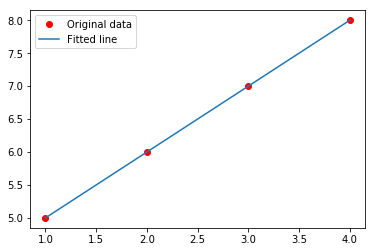

Epoch: 0050 cost= 0.000000094 W= 1.00036 b= 3.99894
Epoch: 0100 cost= 0.000000086 W= 1.00034 b= 3.99899
Optimization Finished!
Training cost= 8.56549e-08 W= 1.00034 b= 3.99899 

Epoch: 0050 cost= 0.000000080 W= 1.00033 b= 3.99902
Epoch: 0100 cost= 0.000000074 W= 1.00032 b= 3.99906
Epoch: 0150 cost= 0.000000068 W= 1.00031 b= 3.99909
Epoch: 0200 cost= 0.000000064 W= 1.0003 b= 3.99913
Optimization Finished!
Training cost= 6.3811e-08 W= 1.0003 b= 3.99913 

Epoch: 0050 cost= 0.000000060 W= 1.00029 b= 3.99915
Epoch: 0100 cost= 0.000000057 W= 1.00028 b= 3.99917
Epoch: 0150 cost= 0.000000054 W= 1.00027 b= 3.9992
Epoch: 0200 cost= 0.000000050 W= 1.00026 b= 3.99923
Epoch: 0250 cost= 0.000000045 W= 1.00025 b= 3.99926
Epoch: 0300 cost= 0.000000042 W= 1.00024 b= 3.99929
Optimization Finished!
Training cost= 4.17857e-08 W= 1.00024 b= 3.99929 

Epoch: 0050 cost= 0.000000039 W= 1.00023 b= 3.99932
Epoch: 0100 cost= 0.000000036 W= 1.00022 b= 3.99934
Epoch: 0150 cost= 0.000000034 W= 1.00021 b= 3.99936
Ep

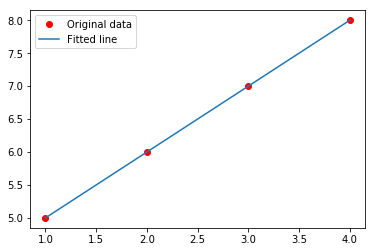

[0.11598709, 0.0052427473, 5.0384555e-05, 1.0294298e-07, 8.5654875e-08, 6.3810973e-08, 4.1785739e-08, 2.2328777e-08]


In [6]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

rate_list=[0.05,0.005]
epoch_list=[100,200,300,400]
j=[]
learning_rate = 0.005
#training_epochs = 1000
display_step = 50

train_X = numpy.asarray([1.,2.,3.,4.])
train_Y = numpy.asarray([5.,6.,7.,8.])
n_samples = train_X.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for rate in rate_list:
        optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
        for training_epochs in epoch_list:
            #optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
            for epoch in range(training_epochs):
                for (x, y) in zip(train_X, train_Y):
                    sess.run(optimizer, feed_dict={X: x, Y: y})
                if (epoch+1) % display_step == 0:
                    c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
                    print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
            print("Optimization Finished!")
            training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
            j.append(training_cost)
        plt.plot(train_X, train_Y, 'ro', label='Original data')
        plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()
    
print(j)

